# Visualizing and summarizing distributions

You saw two examples of different distributions at the end of the last notebook: one of them was uniform (the frequency was approximately constant across all the values samples), and the other one was bell-shaped (also called Gaussian, or *normally-distributed*). 

Many of the data that you will meet will be normally-distributed, as in the second example. 
- Some statistical methods assume that the data that you are analysing are normally-distributed. For these methods, the results may be invalid, or at least different to what you are expecting, if you apply them to data that do not really have this distribution.

Let's look at some real data now...

## 1: The El Niño - Southern Oscillation index

In [1]:
# set up the libraries needed for the analysis
import numpy as np
import pandas as pd # pandas is a data analysis library 
import matplotlib.pyplot as plt # again, we will use matplotlib for plotting
plt.ion()

We will read in and look at the El Niño - Southern Oscillation (ENSO) index. The ENSO index describes climate variability in the tropical Pacific; the index that we will look at is based on the sea surface temperature: https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni. The data that we will look at are monthly values.

The cell below reads in the data and puts it into a time series format. Don't worry too much about how this works for the moment: you can just run the cell (<kbd>shift &#8679;</kbd> + <kbd>return &#8629;</kbd>) to get the data to load, and then use these data afterwards.

In [11]:
# We will read in and look at the El Niño - Southern Oscillation (ENSO) index. The ENSO index describes climate variability in the tropical Pacific; the index that we will look at is based on the sea surface temperature: https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni. The data that we will look at are monthly values.
# 
# The cell below reads in the data and puts it into a time series format. Don't worry too much about how this works for the moment: you can just run the cell (<kbd>shift &#8679;</kbd> + <kbd>return &#8629;</kbd>) to get the data to load, and then use these data afterwards.

# In[ ]:
# the format of the data is a 13 column matrix; the code below sets up a label for each column
months = [i for i in range(0,13)]
months[0] = 'Year'
# the next lines read in the data from the given URL. We'll tell pandas to skip some lines
# where there are missing values
df = pd.read_csv("https://www.psl.noaa.gov/data/correlation/nina34.data",                skiprows=3,skipfooter=4,index_col=0,header=0,                sep='  *',names=months,engine='python').stack().reset_index()
# the next lines use the given value of the year and the month to create a date variable,
# because this information does not exist in the original file
df['date']=pd.to_datetime(df.Year*100+df.level_1,format='%Y%m')
df = df.set_index('date')
# and finally, we delete the original year / month information, and rename the data column
df = df.drop(columns=['Year','level_1'])
df.columns = ['ENSO']

In [12]:
# these lines transfer the variables into "normal" python variables for you to use
date = df.index.values
enso = df['ENSO'].values

We now have two variables: ```date``` and ```enso```. In the cell below make a time series plot using these data (use ```plt.plot```), with date on the x-axis and the ENSO index on the y-axis. Don't forget to label the axes and add a title.

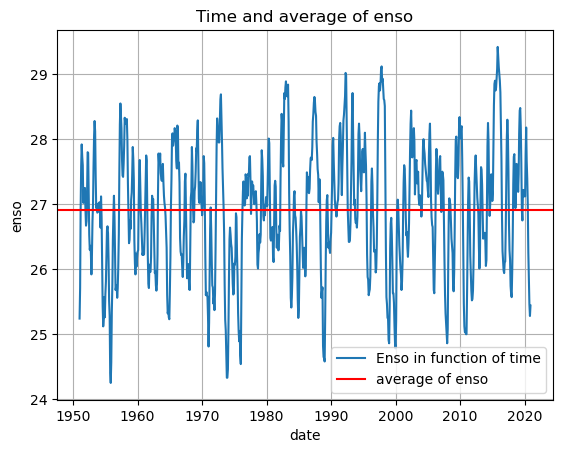

The average value of the index is:  26.917857142857144


In [11]:
# enter your code here
f0 = plt.figure()
p1 = plt.plot(date, enso, label = 'Enso in function of time')
plt.title('Time and average of enso')
plt.xlabel('date')
plt.ylabel('enso')
#to plot the average
plt.axhline(np.mean(enso),color='r', label = 'average of enso')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print('The average value of the index is: ',np.mean(enso))

We can see that ENSO varies at lots of different frequencies: there are several slow oscillations, with approximately 10 year period, and faster oscillations too. 

Estimate the average value of the index by looking at the graph, then run the cell below to calculate the average value:

In [13]:
print('The average value of the index is: ',np.mean(enso))

The average value of the index is:  26.917857142857144


```np.mean(x)``` calculates the average value of a given input, x. You can add the average value of ENSO as a horizontal line to your time series plot above by adding the command ```plt.axhline(np.mean(enso),color='r')``` at the end of the cell

In the cell below, plot a histogram of the ENSO data. You can add a line showing the average value to the figure again using ```plt.axvline```

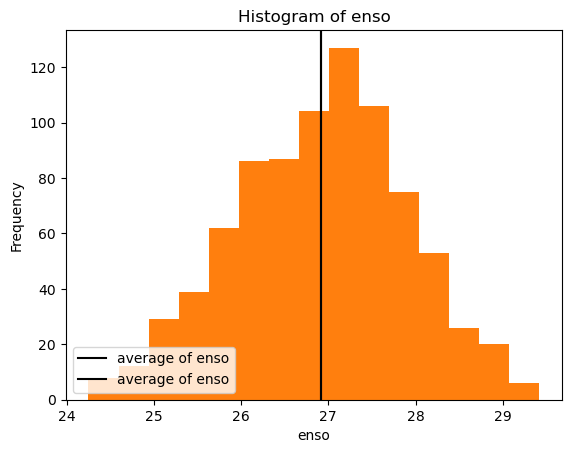

In [13]:
# enter your code here
plt.hist(enso,bins=15)
plt.xlabel('enso')
plt.ylabel('Frequency')
plt.axvline(np.mean(enso),color='black',label = 'average of enso')
plt.legend(loc=3)
plt.title('Histogram of enso')
plt.show()

What do you notice about the location of the mean value?

The mean value is offset to the left from the maximum value .

## 2: Arctic sea ice extent

Now we'll look at a different data set, Arctic sea ice extent. The ENSO index showed a lot of variability, but it didn't seem to change very much in the long-term. You probably know already that Arctic sea ice is not like this: it has decreased a lot since observations began.

Let's look at the data for the summer sea ice extent. We'll load the data for the month of August.

In [19]:
# this data file is in a fairly standard format, so it requires less work
# to read it in than for the last file
df = pd.read_csv("ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/"+\
                 "monthly/data/N_08_extent_v3.0.csv", sep=', ',engine='python')

In [21]:
# we create the variables for the data that we want to look at
year = df['year'].values
extent = df['extent'].values

You now have two new variables: ```year```and ```extent```

What is the sea ice extent? The variable that we measure is _sea ice concentration_. This is a gridded product: it is supplied as matrices of numbers that tell us how much of the area of each given grid cell is covered in sea ice (0-100%). _Sea ice extent_ is the sum of the areas of the grid cells that have at least 15% sea ice concentration. The units of this variable are millions of square kilometers (10<sup>6</sup> km<sup>2</sup>).

Make another time series plot below for this new variable, ```extent```.

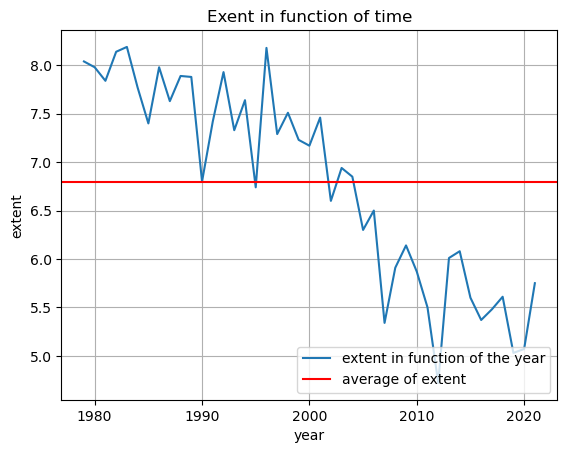

The average value of the index is:  6.793255813953487


In [22]:
# enter your code here
plt.figure()
p1 = plt.plot(year, extent, label='extent in function of the year')
plt.grid()
plt.xlabel('year')
plt.ylabel('extent')
#to plot the average
plt.axhline(np.mean(extent),color='r', label = 'average of extent')
plt.legend(loc='lower right')
plt.title('Exent in function of time')
plt.show()
print('The average value of the index is: ',np.mean(extent))

Estimate the average value from the graph again, then print out the value in the cell below, and add it to the figure as in the last example.

In [ ]:
# print out the value of the average sea ice extent here
print('the value of the average sea ice is ', np.mean(extent))

Finally, plot a histogram again, and add the mean value as a vertical line. How does the location of the line compare with what you found for ENSO?

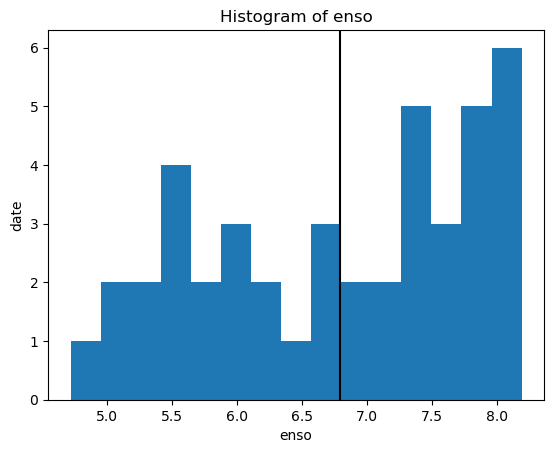

In [30]:
# enter your code here to plot the histogram
plt.hist(extent,bins=15)
plt.xlabel('enso')
plt.ylabel('date')
plt.axvline(np.mean(extent),color='black')
plt.title('Histogram of extent')
plt.show()

This type of distribution is called a skewed distribution: it is asymmetric, with the peak shifted to one side. 
- If the peak is shifted to the right, then the distribution is said to be left-skewed
- If the peak is shifted to the left, then the distribution is said to be right-skewed

Repeat these two figures taking just the period up until the year 2000 (1979-2000). In python, you can select a subset of the data using the notation ```[m:n]``` where ```m``` is the index of the first value that you want to keep, and ```n``` is the index after the final value that you want to keep. For example, to keep the first ten values of ```x```, you can write ```x[:10]```

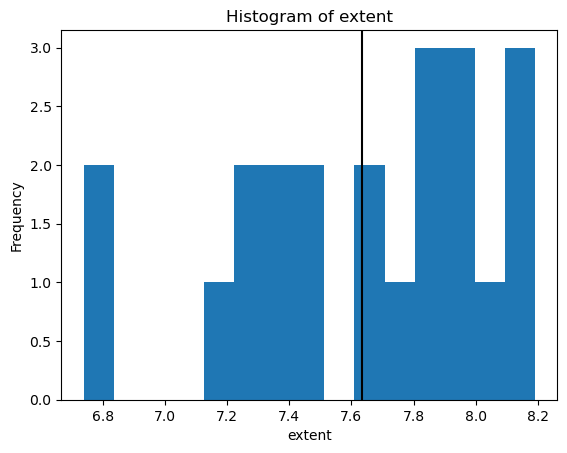

In [31]:
# write code to plot a time series and histogram for the period 1979-2000 here. 
# Add lines to show the average value calculated over this subperiod

#between 1979 and 2000 there are 22 vlaues
plt.hist(extent[:22],bins=15)
plt.xlabel('extent')
plt.ylabel('Frequency')
plt.axvline(np.mean(extent[:22]),color='black')
plt.title('Histogram of extent')
plt.show()
